In [331]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt #Daten visualisieren
import seaborn as sns 

In [332]:
#Datensatz einlesen
data = pd.read_csv('candy-data.csv')

In [333]:
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


# Datensatz untersuchen


In [334]:
data.shape

(85, 13)

Beobachtugen:
- Der Datensatz hat 85 Zeilen und 13 Spalten
-> Das bedeutet 13 Merkmale und 85 Datenpunkte

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


Beobachtungen:
- compatitorname ist ein Objekt
- chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus sind ganze Zahlen (in diesem Fall binäre Zahlen)
- sugarpercent, pricepercent, winpercent sind Gleitkommazahlen

In [336]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


Beobachtungen
- count: keine fehlenden Einträge
- mean: der Durchschnittwert
- std: Standardabweichung
- min: der kleinste Wert
- %: Median
- max: der maximale Wert

In [337]:
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Beobachtungen:
- Es gibt keine fehlenden Werte 

In [338]:
#Droppe 'competitorname', weil es einen Objektwert hat

names = data['competitorname']
data.drop('competitorname', axis=1, inplace=True)

In [339]:
#Wie oft kommt eine Zutat  in den 85 Süßigkeiten vor?

characteristics_columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
                      'crispedricewafer', 'hard', 'bar', 'pluribus']
ingredient_counts = {}

for attribute in characteristics_columns:
    #Anzahl der 1en
    ingredient_counts[attribute] = data[attribute].sum()

print("Anzahl der Vorkommen jeder Zutat:")
for attribute, count in ingredient_counts.items():
    print(f"{attribute}: {count}")

Anzahl der Vorkommen jeder Zutat:
chocolate: 37
fruity: 38
caramel: 14
peanutyalmondy: 14
nougat: 7
crispedricewafer: 7
hard: 15
bar: 21
pluribus: 44


Beobachtungen:
- 'characteristics_columns' sind Eigenschaften der Süßigkeiten (binär ja/nein)
- winpercent, sugarpercent und pricepercent sind Produktmetriken

- Am häufigsten kommen 'chocolate' (37) und 'fruity' (38) als Zutaten vor, was bedeutet, dass Schokolade und Fruchtgeschmack beliebte Zutaten sind.
- 'Nougat' (7) und 'crispedricewafer' (7) kommen nicht so oft in diesem Datensatz vor.
- Andere Zutaten haben Häufigkeiten zwischen 14 und 44.

In [340]:
#Sortieren nach Top 15 winpercent
top_15_sweets = data.sort_values(by='winpercent', ascending=False).head(15)

ingredient_counts_top_15 = {}

for attribute in characteristics_columns:
    #Anzahl der 1en 
    ingredient_counts_top_15[attribute] = top_15_sweets[attribute].sum()

print("Anzahl der Vorkommen jeder Zutat in den Top 15 Süßigkeiten:")
for attribute, count in ingredient_counts_top_15.items():
    print(f"{attribute}: {count}")

Anzahl der Vorkommen jeder Zutat in den Top 15 Süßigkeiten:
chocolate: 14
fruity: 1
caramel: 4
peanutyalmondy: 8
nougat: 3
crispedricewafer: 3
hard: 0
bar: 7
pluribus: 5


Beobachtungen
- Hier fällt auf, dass von den 15 beliebtesten Süßigkeiten in 14 davon Schokolade vorkommt.
- Peanutyalmondy ist ebenfalls sehr beliebt, da es in 8 von 15 vorkommt.
- Wir sehen auch, dass "bar" beliebt ist, da es in 7 von 15 vorkommt.

In [341]:
# Sortieren nach kleinsten Top 15 winpercent
bottom_15_sweets = data.sort_values(by='winpercent').head(15)

ingredient_counts_bottom_15 = {}

for attribute in characteristics_columns:
    #Anzahl der 1en
    ingredient_counts_bottom_15[attribute] = bottom_15_sweets[attribute].sum()

print("Anzahl der Vorkommen jeder Zutat in den 15 Süßigkeiten mit den kleinsten winpercent:")
for attribute, count in ingredient_counts_bottom_15.items():
    print(f"{attribute}: {count}")

Anzahl der Vorkommen jeder Zutat in den 15 Süßigkeiten mit den kleinsten winpercent:
chocolate: 1
fruity: 8
caramel: 3
peanutyalmondy: 1
nougat: 0
crispedricewafer: 0
hard: 4
bar: 0
pluribus: 10


Beobachtungen
- Hier sehen wir, dass der Geschmack "fruity" in 8 von 15 Fällen vorkommt, was darauf hinweist, dass der Geschmack "fruity" nicht besonders beliebt ist.
- Wir sehen auch, dass "pluribus" 10 Mal von 15 Malen vorkommt, was darauf hinweist, dass es nicht besonders beliebt ist.

# Korrelation

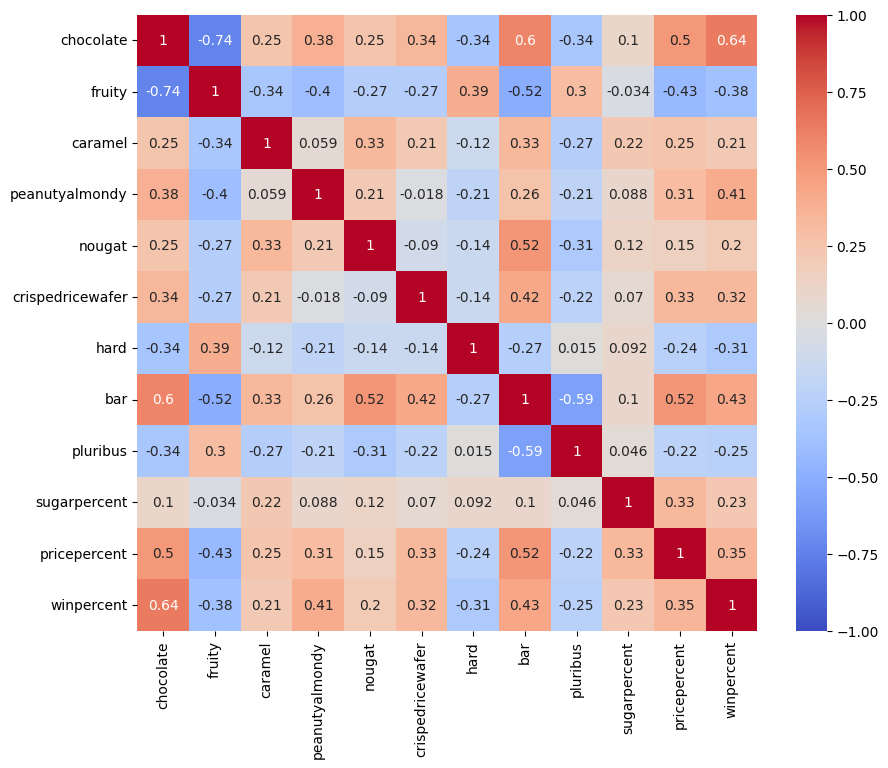

In [342]:
#Korrelationsmatrix visualisieren 
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

Beobachtungen:
- Was uns auffällt ist, dass "chocolate" und "winpercent" eine große Korrelation von 0,64 aufweisen. Das bedeutet, dass diese Variablen eine starke Verbindung haben. Dies kann so interpretiert werden: Süßigkeiten mit Schokolade sind sehr beliebt.
- "Chocolate" und "bar" haben ebenfalls eine sehr große Korrelation, was bedeutet, dass viele Schokoladen in Form von Riegeln vorliegen (0,6).
- Die kleinste Korrelation besteht zwischen "chocolate" und "fruity" (0,74), was uns sagt, dass die Verbindung zwischen ihnen sehr schwach ist. Das bedeutet, dass viele Süßigkeiten entweder das eine oder das andere enthalten.
- Hier ist auch zu sehen, dass "fruity" nicht so beliebt ist, da es eine Korrelation von -0,38 aufweist.
- "Fruity" hat überall eine negative Korrelation außer mit "hard" und "pluribus", was bedeutet, dass "fruity" sehr oft in dieser Form vorkommt.
- "Caramel" passt eher zu "chocolate", "nougat" und ist in Riegel-Form.
- "Peanutyalmondy" hat auch eine große Korrelation mit "chocolate" (0,38) und "winpercent" (0,41).
- "Nougat" hat eine große Korrelation mit "bar" (0,52).
- "Crispedricewafer" hat ebenfalls eine sehr große Korrelation mit "bar" (0,42).
- "Bar" hat eine große Korrelation mit "pricepercent" (0,52).
- "Pluribus" hat nur eine gute Verbindung mit "fruity" (0,3).
- "Sugarpercent" zeigt bei allen Merkmalen (außer price, win und sugar) eine Korrelation um die 0.
- "Pricepercent" sagt uns, dass der Preis von "chocolate" und "bar" größer ist als bei anderen.
- In "winpercent" ist nochmals zu erkennen, dass "bar", "chocolate", "peanutyalmondy" und "crispedricewafer" als Merkmale sehr beliebt sind, während "fruity", "hard" und "pluribus" nicht so beliebt sind.

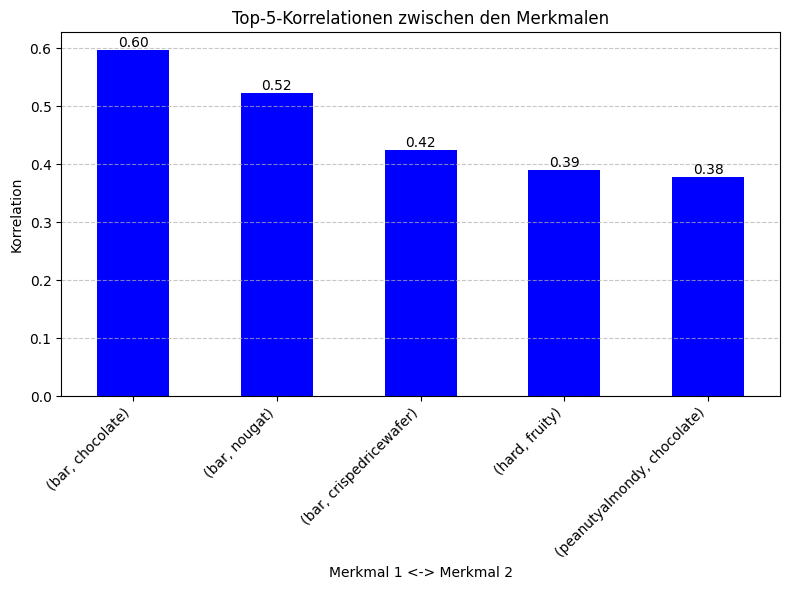

In [349]:
# Korrelationsmatrix zwischen allen Merkmalen (außer 'winpercent', 'pricepercent' und 'sugarpercent')
correlation_matrix = data.drop(['winpercent', 'pricepercent', 'sugarpercent'], axis=1).corr()

# Ohne die Diagonale (damit gleiche Werte nicht doppelt vorkommen)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Sortiere Korrelationen
sorted_correlations = upper_triangle.unstack().sort_values(ascending=False)

# Top-5-Korrelationen
top_5_correlations = sorted_correlations.head(5)

# Balkendiagramm
plt.figure(figsize=(8, 6))
bar_plot = top_5_correlations.plot(kind='bar', color='blue')
plt.title('Top-5-Korrelationen zwischen den Merkmalen')
plt.xlabel('Merkmal 1 <-> Merkmal 2')
plt.ylabel('Korrelation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Werte anzeigen
for i, v in enumerate(top_5_correlations):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Beobachtungen
- Ausgabe der Merkmale mit höchster Korrelation zur Veranschaulichung
- Hier ist zu beobachten, dass "bar" sehr viele hohe Korrelationen aufweist, insbesondere mit "chocolate", "nougat" und "crispedricewafer".
- Auch "chocolate" hat sehr viele hohe Korrelationen, einmal mit "bar" und "peanutyalmondy".
- "Hard" und "fruity" haben ebenfalls eine sehr hohe Korrelation, was bedeutet, dass sie häufig zusammen vorkommen. Jedoch, basierend auf den obigen Beispielen, sind sie nicht besonders beliebt.

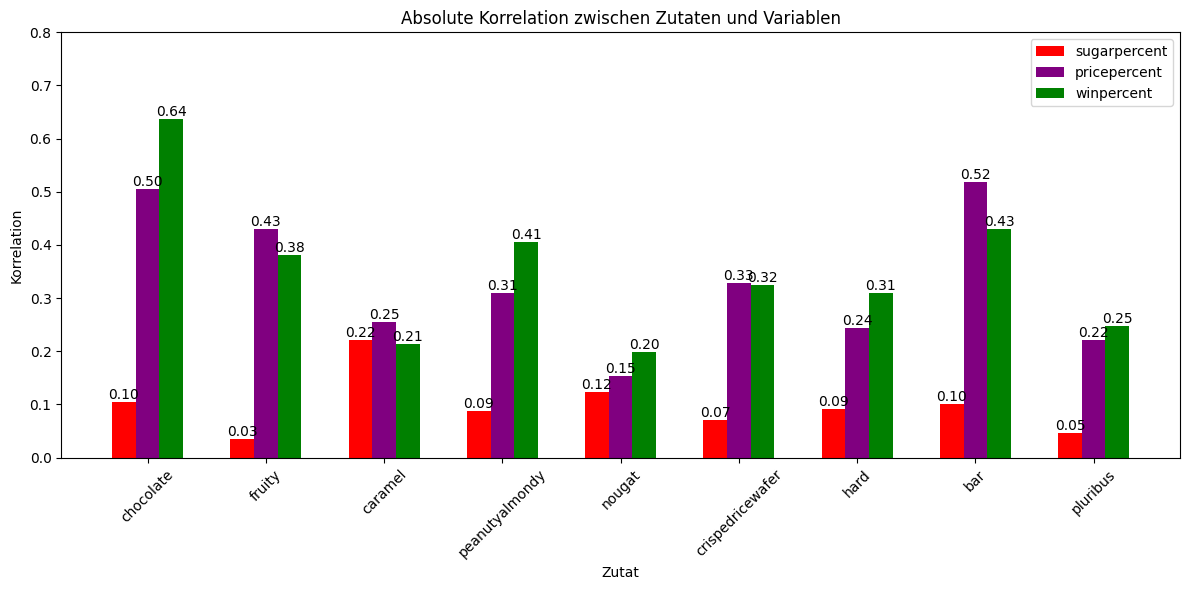

In [344]:
variable_columns = ['sugarpercent', 'pricepercent', 'winpercent']

# Korrelation zwischen jeder Zutatenkategorie und jeder Variable
correlation_matrix = data[characteristics_columns + variable_columns].corr()

plt.figure(figsize=(12, 6))
bar_width = 0.2
ingredient_positions = np.arange(len(characteristics_columns))
colors = ['red', 'purple', 'green']

# Korrelationen für jede Variable mit den angegebenen Farben
for i, variable in enumerate(variable_columns):
    x_positions = ingredient_positions + (i - 1) * bar_width   
    bars = plt.bar(x_positions, np.abs(correlation_matrix[variable][:len(ingredient_columns)]), 
                   width=bar_width, label=variable, color=colors[i])
    
    # Werte hinzufügen
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, 
                 '{:.2f}'.format(height), ha='center', va='bottom')

plt.title('Absolute Korrelation zwischen Zutaten und Variablen')
plt.xlabel('Zutat')
plt.ylabel('Korrelation')
plt.ylim(0, 0.8) 
plt.xticks(ingredient_positions, characteristics_columns, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Beobachtungen:
- Sugarpercent: Hier ist zu beobachten, dass der Sugarpercent bei einzelnen Zutaten nicht stark variiert, die Werte weichen nicht stark voneinander ab (außer Caramel, das deutlich mehr Zucker als die anderen Zutaten hat).
- Pricepercent: Hier sehen wir, dass zum Beispiel "chocolate" und "bar" teurer sind als zum Beispiel "nougat" und "pluribus".
- Winpercent wurde bereits oben beschrieben.

- Was hier auch interessant ist, dass je beliebter die Zutat ist, desto teurer ist sie auch und umgekehrt. Zum Beispiel ist "nougat" als Zutat nicht besonders beliebt, aber auch nicht übermäßig teuer.

# Lineare Regression

Coefficients:
chocolate           19.254898
fruity              11.038507
caramel              4.149092
peanutyalmondy       7.705778
nougat               2.501979
crispedricewafer     4.683797
hard                -5.298195
bar                  0.570327
pluribus            -3.001691
dtype: float64

Bias (Intercept): 36.89487672885427

R^2 Score (Trainingsdaten): 0.5335834221682358
R^2 Score (Testdaten): 0.40513936910870285


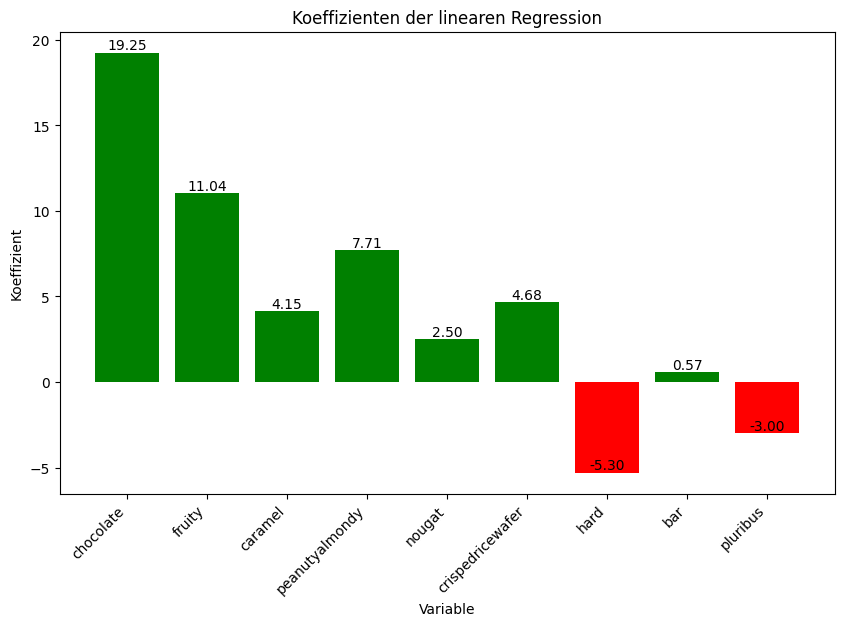

In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# relevanten Spalten für lineare Regression
X = data[characteristics_columns]
y = data['winpercent']

# Aufteilen der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

# Das Modell trainieren 
model.fit(X_train, y_train)

# Koeffizienten ausgeben
coefficients = pd.Series(model.coef_, index=characteristics_columns)
print("Coefficients:")
print(coefficients)

# Bias (y-Achsenabschnitt) des Modells anzeigen
print("\nBias (Intercept):", model.intercept_)

# Bestimme das (Bestimmtheitsmaß) 
r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)
print("\nR^2 Score (Trainingsdaten):", r_squared_train)
print("R^2 Score (Testdaten):", r_squared_test)

# Balkendiagramm
plt.figure(figsize=(10, 6))
bars = plt.bar(characteristics_columns, coefficients, color=['green' if c >= 0 else 'red' for c in coefficients])
plt.xlabel('Variable')
plt.ylabel('Koeffizient')
plt.title('Koeffizienten der linearen Regression')
plt.xticks(rotation=45, ha='right')

# Werte anzeigen
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             '{:.2f}'.format(height), ha='center', va='bottom')

plt.show()



Beobachtungen:
- Hier wurde Regressionsgerade an diesem Datensatz angewendet
- Das Koeffizienten geben an, wie stark jede unabhängige Variable (Zutat) die abhängige Varibale (winpercent) beeinflusst
- "chocolate" hat einen hat einen Koeffizienten in Höhe von 19.254898, was bedeutet, das Schokolade den winpercent um etwa 20% erhöht, also stark beeinflusst
- "fruity erhöht den winpercent um etwa 10%
- peanutyalmondy erhöht den winpercent um fat 8%
- "hard" und "pluribus" verringen den winpercent

- Ein Wert von 0,53 für die Trainingsdaten und 0,41 für die Testdaten deutet darauf hin, dass das Modell etwa 53% bzw. 41% der Variabilität in "winpercent" erklären kann. Das Modell erklärt die abhängige Variable relativ gut, aber es gibt noch Raum für Verbesserungen.

# Entscheidungsbäume

Feature Importance:
chocolate           0.501824
fruity              0.064356
caramel             0.057472
peanutyalmondy      0.109738
nougat              0.003990
crispedricewafer    0.023451
hard                0.028502
bar                 0.177807
pluribus            0.032861
dtype: float64
R^2 Score (Trainingsdaten): 0.8622962103668392
R^2 Score (Testdaten): 0.21955939516705136


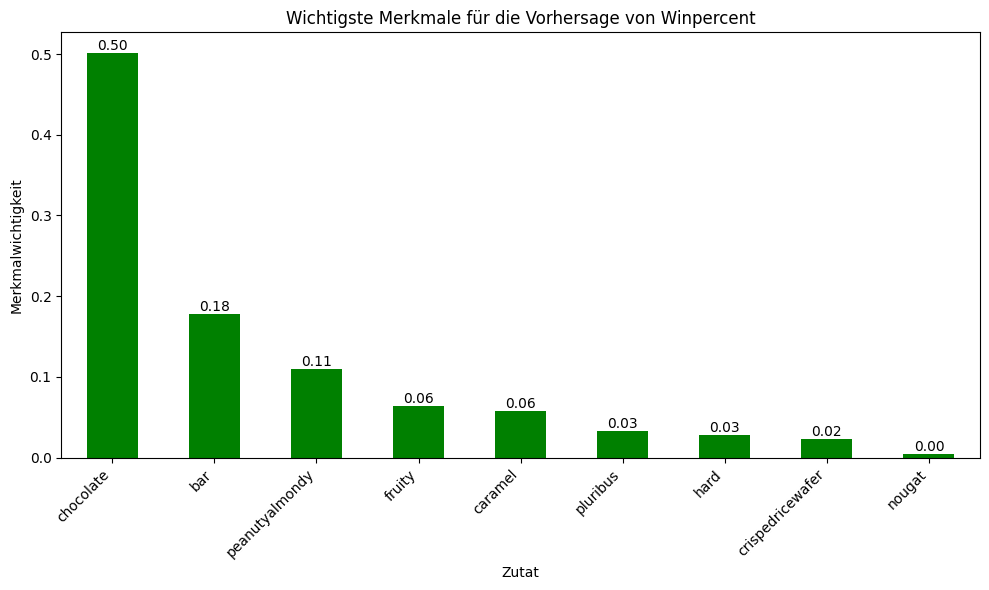

In [346]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Das Entscheidungsbaumregressionsmodell
model = DecisionTreeRegressor(random_state=42)

# Das Modell trainieren
model.fit(X_train, y_train)

# Wichtigste Merkmale zeigen
feature_importance = pd.Series(model.feature_importances_, index=characteristics_columns)
print("Feature Importance:")
print(feature_importance)

# Vorhersagen
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Berechne R^2
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)
print("R^2 Score (Trainingsdaten):", r_squared_train)
print("R^2 Score (Testdaten):", r_squared_test)

# Balkendiagramm für die wichtigste Merkmale
plt.figure(figsize=(10, 6))
bars = feature_importance.sort_values(ascending=False).plot(kind='bar', color='green')
plt.xlabel('Zutat')
plt.ylabel('Merkmalwichtigkeit')
plt.title('Wichtigste Merkmale für die Vorhersage von Winpercent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Werte der Balken
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             '{:.2f}'.format(bar.get_height()), ha='center', va='bottom')

plt.show()



Beobachtungen
- Wir sehen das in diesem Modell Varibale "chocolate" den höchsten Beitrag zur Vorhesageleistung hat, gefolgt von "bar", "peanutyalmondy" und anderen
- Das Modell kann etwa 86,2% der Variabilität in den Trainingsdaten erklären. 
- Die Testdatenscore ist jedoch nur 0.220, was bedeutet, dass das Modell die Variabilität in den Testdaten weniger gut erklären kann. 

- Hier sieht man, dass "chocolate" und "bar" einen sehr wichtigen Einfluss auf den Winpercent haben. Aus der obigen Analyse können wir daher schließen, dass diese Merkmale auf jeden Fall in unserer neuen Süßigkeit enthalten sein sollten.

# Fazit

Winpercent für die Kombination von chocolate und bar: 62.045353399999996
Winpercent für Kombination von chocolate, bar und peanutyalmondy: 61.45453633333333
Winpercent für Kombination von chocolate, bar und crispedricewafer: 68.9446085
Winpercent für Kombination von chocolate, bar und caramel: 67.49822700000001
Winpercent für Kombination von chocolate, bar und nougat: 62.344426500000004
Winpercent für Kombination von chocolate, bar, peanutyalmondy und crispedricewafer: 59.529251
Winpercent für Kombination von chocolate, bar, peanutyalmondy und caramel: 64.37252666666666
Winpercent für Kombination von chocolate, bar, peanutyalmondy und nougat: 66.7941645
Winpercent für Kombination von chocolate, bar, crispedricewafer und caramel: 69.38129666666667
Winpercent für Kombination von chocolate, bar, crispedricewafer und nougat: nan
Winpercent für Kombination von chocolate, bar, caramel und nougat: 66.8721465


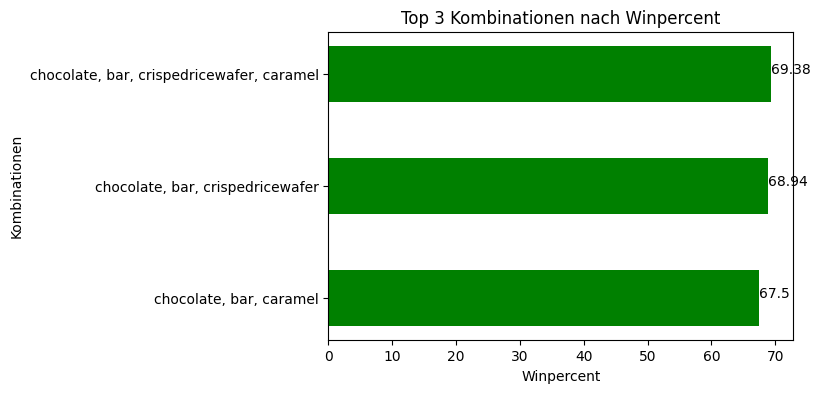

In [347]:
import matplotlib.pyplot as plt

# Liste der weiteren Zutaten, die gute Korrelation mit chocolate und bar gezeigt haben
additional_ingredients = ['peanutyalmondy', 'crispedricewafer', 'caramel', 'nougat']

# Zur Speicherung der Kombinationen und winpercent
combination_winpercent_dict = {}

# "chocolate" und "bar"
chocolate_bar_data = data[(data['chocolate'] == 1) & (data['bar'] == 1)]
chocolate_bar_winpercent = chocolate_bar_data['winpercent'].mean()
print(f"Winpercent für die Kombination von chocolate und bar: {chocolate_bar_winpercent}")

# "chocolate", "bar" und jeder einzelnen zusätzlichen Zutat
for ingredient in additional_ingredients:
    combination_data = data[(data['chocolate'] == 1) & (data['bar'] == 1) & (data[ingredient] == 1)]
    combination_winpercent = combination_data['winpercent'].mean()
    combination_winpercent_dict[f"chocolate, bar, {ingredient}"] = combination_winpercent
    print(f"Winpercent für Kombination von chocolate, bar und {ingredient}: {combination_winpercent}")

# "chocolate", "bar" und zwei zusätzlichen Zutaten
for i in range(len(additional_ingredients)):
    ingredient1 = additional_ingredients[i]
    for j in range(i+1, len(additional_ingredients)):
        ingredient2 = additional_ingredients[j]
        combination_data = data[(data['chocolate'] == 1) & (data['bar'] == 1) & (data[ingredient1] == 1) & (data[ingredient2] == 1)]
        combination_winpercent = combination_data['winpercent'].mean()
        combination_winpercent_dict[f"chocolate, bar, {ingredient1}, {ingredient2}"] = combination_winpercent
        print(f"Winpercent für Kombination von chocolate, bar, {ingredient1} und {ingredient2}: {combination_winpercent}")

# Sortieren nach den winpercent
sorted_combinations = sorted(combination_winpercent_dict.items(), key=lambda x: x[1], reverse=True)

# Top 3 Kombinationen
top_3_combinations = [comb[0] for comb in sorted_combinations[:3]]
top_3_winpercent = [comb[1] for comb in sorted_combinations[:3]]

# Balkendiagramm für die Top 3 Kombis
plt.figure(figsize=(6, 4))
plt.barh(top_3_combinations, top_3_winpercent, color='green', height=0.5)
plt.xlabel('Winpercent')
plt.ylabel('Kombinationen')
plt.title('Top 3 Kombinationen nach Winpercent')
plt.gca().invert_yaxis() 

for index, value in enumerate(top_3_winpercent):
    plt.text(value, index, str(round(value, 2)))

plt.show()



Beobachtungen:

- Nachdem ich den Datensatz auf die wichtigsten Korrelationen und die Wichtigkeit der einzelnen Merkmale untersucht habe, suche ich die Süßigkeit mit der Zutatenkombination, die den größten "winpercent" ergibt.
- Da jedoch eine sehr starke Korrelation zwischen "bar" und "chocolate" besteht und wir aus dem echten Leben wissen, dass dies eine Zutat ist und das andere eine Form von Süßigkeit, und da beide Merkmale sehr beliebt sind, müssen sie definitiv zusammen auftreten. Jetzt suchen wir nach der besten Kombination von Merkmalen mit "bar" und Schokolade:
    - chocolate, bar, crispedricewafer, caramel
    - chocolate, bar, crispedricewafer
    - chocolate, bar, caramel

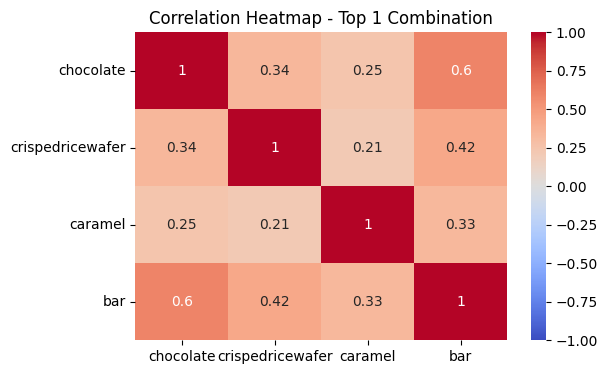

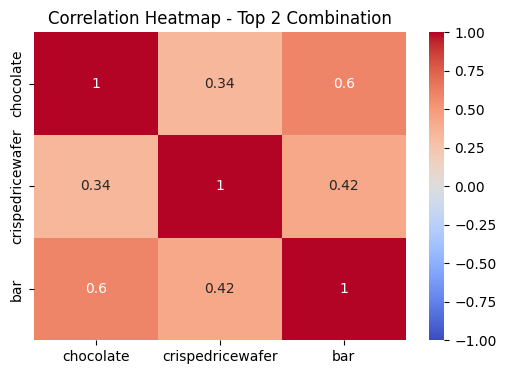

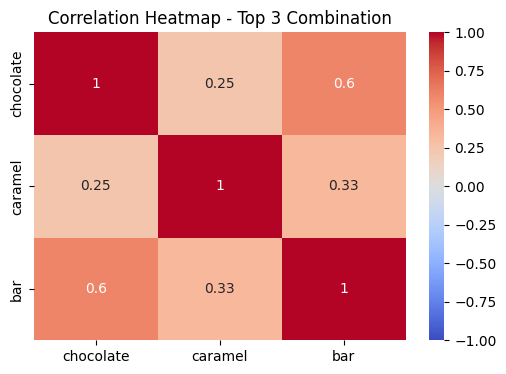

In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Top 3
top1 = ['chocolate', 'crispedricewafer', 'caramel', 'bar']
top2 = ['chocolate', 'crispedricewafer', 'bar']
top3 = ['chocolate', 'caramel', 'bar']

# DataFrame für jede Kombination
top1_df = data[top1]
top2_df = data[top2]
top3_df = data[top3]

# Korrelation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(top1_df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.title("Correlation Heatmap - Top 1 Combination")
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(top2_df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.title("Correlation Heatmap - Top 2 Combination")
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(top3_df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.title("Correlation Heatmap - Top 3 Combination")
plt.show()


Beobachtungen:
- Hier wird noch einmal geprüft, ob die Korrelationen zwischen den Top 3 Süßigkeiten passen, und wie wir sehen können, liegt die Korrelation zwischen diesen Daten im positiven Bereich.
- Diese Zutaten, die den größten Einfluss auf den Winpercent haben, korrelieren gut miteinander und können in der Praxis auch gut kombiniert werden.